In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Mall_Customers.csv")

In [3]:
# x= ds.iloc[:,[3,4]] # Will present as dataset
x= ds.iloc[:,[3,4]].values #will appaear as list [:,3:5]

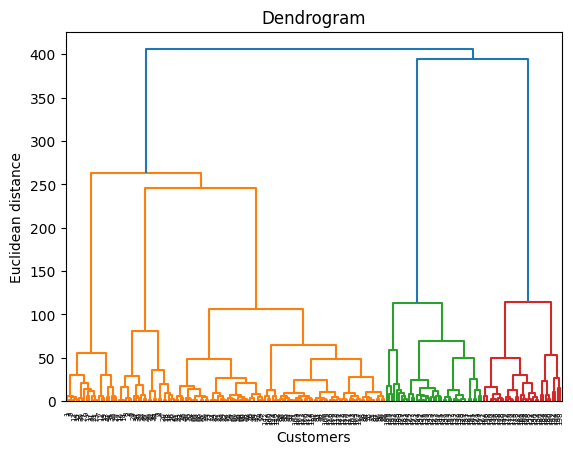

In [4]:
#Identify the possible clusters 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
#plotting to find the detail targeting clusters
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

In [6]:
# above we identify the number of cluster and passing it to built the model
from sklearn.cluster import AgglomerativeClustering
Cluster = AgglomerativeClustering(n_clusters = 5)

predict = Cluster.fit_predict(x) # model created by fit and predict which category it belongs to
# here we dont have the training and test set
predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [7]:
#adding the identified cluster in the data set
#supervised = pd.DataFrame(ds)
supervised = ds
supervised['Cluster_Group'] = predict
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [8]:
#supervised.to_csv("Cluster.csv",index=False)

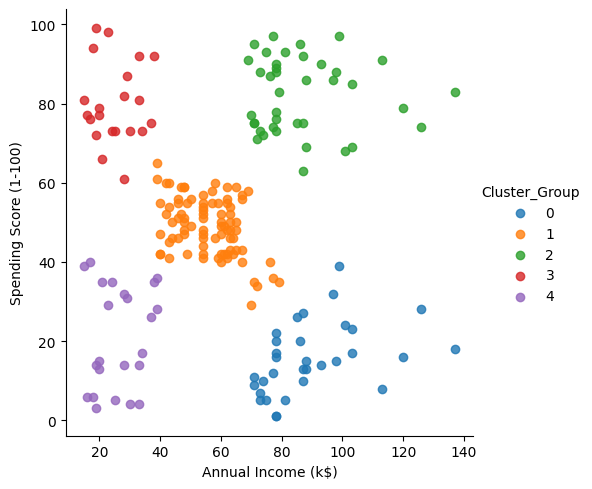

In [11]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5], fit_reg=False)
        